# Import Libraries

In [76]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

# Importing & Preprocessing Dataset

In [77]:
df = pd.read_csv("ChurnData.csv")
churn_df = df[
    [
        "tenure",
        "age",
        "address",
        "income",
        "ed",
        "employ",
        "equip",
        "callcard",
        "wireless",
        "churn",
    ]
]
churn_df.loc[:, "churn"] = churn_df.loc[:, "churn"].astype("int")
churn_df.head()
churn_df.shape

(200, 10)

# Dependent & Independent Features

In [78]:
X = np.asarray(
    churn_df[["tenure", "age", "address", "income", "ed", "employ", "equip"]]
)
X[0:5]
y = np.asarray(churn_df["churn"])
y[0:5]

array([1., 1., 0., 0., 0.])

# Normalize Dataset

In [79]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

# Train/Test dataset

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


# Modeling (Logistic Regression with Scikit-learn)

In [81]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(C=0.01, solver="liblinear")
regressor.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

# Prediction

In [82]:
yhat = regressor.predict(X_test)
yhat
yhat_prob = regressor.predict_proba(X_test)
yhat_prob

array([[0.7 , 0.3 ],
       [0.5 , 0.5 ],
       [0.51, 0.49],
       [0.46, 0.54],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.65, 0.35],
       [0.61, 0.39],
       [0.6 , 0.4 ],
       [0.58, 0.42],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.63, 0.37],
       [0.65, 0.35],
       [0.57, 0.43],
       [0.74, 0.26],
       [0.55, 0.45],
       [0.5 , 0.5 ],
       [0.41, 0.59],
       [0.64, 0.36],
       [0.45, 0.55],
       [0.41, 0.59],
       [0.67, 0.33],
       [0.51, 0.49],
       [0.55, 0.45],
       [0.53, 0.47],
       [0.59, 0.41],
       [0.66, 0.34],
       [0.53, 0.47],
       [0.51, 0.49],
       [0.46, 0.54],
       [0.47, 0.53],
       [0.69, 0.31],
       [0.63, 0.37],
       [0.53, 0.47],
       [0.66, 0.34],
       [0.66, 0.34],
       [0.5 , 0.5 ],
       [0.49, 0.51],
       [0.52, 0.48]])

# Evaluation

## Jaccard Index

define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0

In [83]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat, pos_label=0)

0.8125

# Confusion Matrix

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools


def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


print(confusion_matrix(y_test, yhat, labels=[1, 0]))

[[ 8  3]
 [ 3 26]]


Confusion matrix, without normalization
[[ 8  3]
 [ 3 26]]


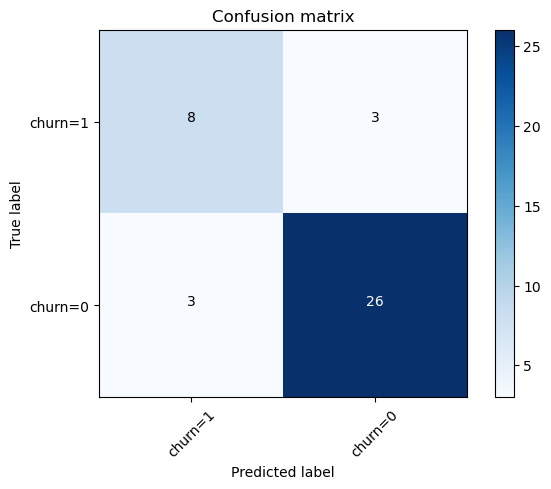

In [85]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cnf_matrix,
    classes=["churn=1", "churn=0"],
    normalize=False,
    title="Confusion matrix",
)

In [86]:
from sklearn.metrics import log_loss

log_loss(y_test, yhat_prob)

0.570822763514098